In [13]:
import glob
import scipy
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare
from natsort import natsorted
from scipy.stats import describe
from scipy.signal import filtfilt
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
import matplotlib
from numpy.linalg import svd

In [14]:
path = '/Users/patrick/Documents/phd/GitHub/tikhonov/'

In [28]:
g4iso_files = natsorted(glob.glob(path+"g4out/*KE_*_iso.csv"))
R = []
D = []

for i in range(5,len(g4iso_files)-101,10): # 100 keV to 1 MeV energy range in steps of 100 keV
    R.append(np.loadtxt(open(g4iso_files[i], "r"), delimiter=",",skiprows=9)[30:400:1,3]/5000000.0)
R = np.transpose(np.array(R))
RR = R
for j in range(0,370): # X-ray spectra from 0 to 600 keV
    if (np.linalg.norm(R[j,:] > 0)):
        D.append((1.0/np.linalg.norm(R[j,:]))) # Diagonal scaling as a left pre-conditioner
    else:
        D.append(1)

DD = np.diag(D)
RT = np.matmul(DD,R)

S = []
for k in range(0,R.shape[1]):
    #S.append(1.0/(k+1)**2) # right pre-conditioner towards an exponential
    S.append(1.0/np.sum(R[:,k]))
    #S.append(alexa_model_exp[k])
    #S.append(1)
SS = np.diag(S)
RS = np.matmul(RT,SS)

print('response condition number: ' + str(np.linalg.cond(R)))
print('response condition number after preconditioning: ' + str(np.linalg.cond(RS)))

elow_keV = 50
ehigh_keV = 1000
xspace_estep_keV = 1
espace_estep_keV = 10

espace = np.linspace(elow_keV,ehigh_keV,R.shape[1])
xspace = np.linspace(30,400,R.shape[0])
svd100 = np.linalg.svd(R)[1]

response condition number: 2859.3284534840923
response condition number after preconditioning: 44.79055802548676


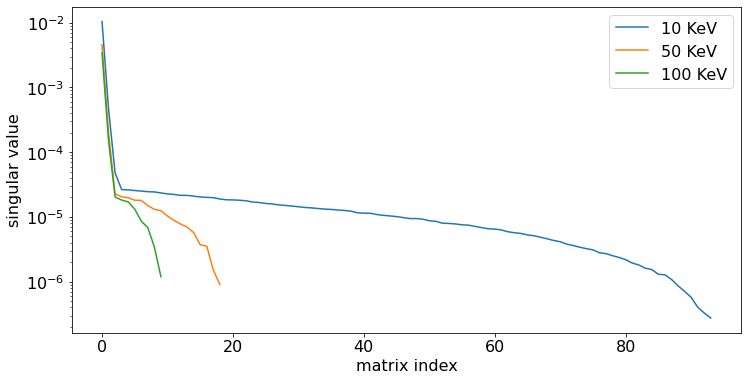

In [35]:
fig = plt.figure(figsize=(12,6))
gs = plt.GridSpec(nrows=1, ncols=1,hspace=.5,wspace=.3)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

ax = fig.add_subplot(gs[0,0])

ax.semilogy(svd10,label="10 KeV")
ax.semilogy(svd50,label="50 KeV")
ax.semilogy(svd100, label="100 KeV")
ax.set_ylabel("singular value")
ax.set_xlabel("matrix index")
ax.legend()

plt.savefig('fig_6.pdf')  